In [354]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/analyzing-customer-spending-habits-to-improve-sa/SalesForCourse_quizz_table.csv


# Source of Data

In [404]:
df = pd.read_csv("/kaggle/input/analyzing-customer-spending-habits-to-improve-sa/SalesForCourse_quizz_table.csv")

# Purpose

มีวัตถุประสงค์เพื่อศึกษาพฤติกรรมการใช้จ่ายของลูกค้าเพื่อวิเคราะห์และดูภาพรวมพฤติกรรมการใช้จ่ายของลูกค้าในผลิตภัณฑ์และบริการเพื่อปรับปรุงประสิทธิภาพการขาย 

# Descritions of attributes

**การวิเคราะห์พฤติกรรมการใช้จ่ายของลูกค้าเพื่อปรับปรุงประสิทธิภาพการขาย** 

Date: วันที่ขายสินค้า

Year: ปีที่ขายสินค้า

Month: เดือนที่ขายสินค้า

Customer Age: อายุของลูกค้า

Customer Gender: เพศของลูกค้า

Country: ประเทศ

State: เมือง

Product Category: ประเภทของสินค้า

Sub Category: ประเภทย่อยของสินค้า

Quantity: จำนวนสินค้า

Cost: ราคาต้นทุนสินค้า

Unit Cost: ราคาต้นทุนสินค้าต่อหน่วย

Unit Price: ราคาสินค้าต่อหน่วย

Revenue: รายได้รวมที่เกิดจากการขาย



In [405]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34867 entries, 0 to 34866
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             34867 non-null  int64  
 1   Date              34866 non-null  object 
 2   Year              34866 non-null  float64
 3   Month             34866 non-null  object 
 4   Customer Age      34866 non-null  float64
 5   Customer Gender   34866 non-null  object 
 6   Country           34866 non-null  object 
 7   State             34866 non-null  object 
 8   Product Category  34866 non-null  object 
 9   Sub Category      34866 non-null  object 
 10  Quantity          34866 non-null  float64
 11  Unit Cost         34866 non-null  float64
 12  Unit Price        34866 non-null  float64
 13  Cost              34866 non-null  float64
 14  Revenue           34867 non-null  float64
 15  Column1           2574 non-null   float64
dtypes: float64(8), int64(1), object(7)
memor

(34867, 16)

In [407]:
df['Date'] = pd.to_datetime(df['Date'])

In [408]:
df.describe()

,index,Date,Year,Customer Age,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
count,34867.000000,34866,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34867.000000,2574.000000
mean,17433.000000,2016-01-19 18:35:05.110996224,2015.569237,36.382895,2.002524,349.880567,389.232485,576.004532,640.870093,688.054913
min,0.000000,2015-01-01 00:00:00,2015.000000,17.000000,1.000000,0.670000,0.666667,2.000000,2.000000,2.000000
25%,8716.500000,2015-10-26 00:00:00,2015.000000,28.000000,1.000000,45.000000,53.666667,85.000000,102.000000,104.250000
50%,17433.000000,2016-01-28 00:00:00,2016.000000,35.000000,2.000000,150.000000,179.000000,261.000000,319.000000,390.500000
75%,26149.500000,2016-04-26 00:00:00,2016.000000,44.000000,3.000000,455.000000,521.000000,769.000000,902.000000,975.750000
max,34866.000000,2016-07-31 00:00:00,2016.000000,87.000000,3.000000,3240.000000,5082.000000,3600.000000,5082.000000,3681.000000
std,10065.380254,NaN,0.495190,11.112902,0.813936,490.015846,525.319091,690.500395,736.640033,774.200897


# Data Cleansing & Wrangling

**1. ลบ Column ที่ไม่ได้ใช้งานและไม่มีคำอธิบาย**

In [409]:
del df['Column1']

**2. ตรวจสอบว่าแต่ละ Column มีค่าว่างหรือไม่**

In [410]:
df.isnull().any()

index               False
Date                 True
Year                 True
Month                True
Customer Age         True
Customer Gender      True
Country              True
State                True
Product Category     True
Sub Category         True
Quantity             True
Unit Cost            True
Unit Price           True
Cost                 True
Revenue             False
dtype: bool

In [411]:
df[df.isna().any(axis=1)]

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue
34866,34866,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,641.532095


> พบว่ามีข้อมูลที่ขาดหายไปจำนวน 1 แถว
> หากแทนค่าข้อมูลด้วยค่ากลางหรือค่าส่วนมาก อาจมีความเสี่ยงที่จะ Biased หรือข้อมูลไม่ถูกต้อง

**3. จัดการค่าว่าง**

In [412]:
df = df.dropna()
df

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue
0,0,2016-02-19,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0
1,1,2016-02-20,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0
2,2,2016-02-27,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0
3,3,2016-03-12,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0
4,4,2016-03-12,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34861,34861,2015-03-22,2015.0,March,38.0,M,France,Charente-Maritime,Bikes,Mountain Bikes,1.0,2049.00,1487.000000,2049.0,1487.0
34862,34862,2016-02-07,2016.0,February,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,2.0,1160.00,985.500000,2320.0,1971.0
34863,34863,2015-03-13,2015.0,March,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,1.0,2049.00,1583.000000,2049.0,1583.0
34864,34864,2015-04-05,2015.0,April,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,3.0,683.00,560.666667,2049.0,1682.0


> ตัดข้อมูลที่มีค่าว่างออกจากข้อมูลทั้งหมด จำนวน 1 แถว

**4. เพิ่มคอลัมน์ Unit Margin (ส่วนต่างของราคาสินค้า) และ Profit (กำไร)**

In [413]:
df['Unit Margin'] = df['Unit Price'] - df['Unit Cost'] #ราคาสินค้าต่อหน่วย - ลบต้นทุนสินค้าต่อหน่วย = ส่วนต่างของสินค้าในแต่ละหน่วย
df['Profit'] = df['Revenue'] - df['Cost'] #รายได้จากการขายสินค้า - ต้นทุนสินค้าทั้งหมด = กำไร

df

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Unit Margin,Profit
0,0,2016-02-19,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0,29.000000,29.0
1,1,2016-02-20,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0,4.000000,8.0
2,2,2016-02-27,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0,1.330000,4.0
3,3,2016-03-12,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0,29.000000,58.0
4,4,2016-03-12,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0,6.666667,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34861,34861,2015-03-22,2015.0,March,38.0,M,France,Charente-Maritime,Bikes,Mountain Bikes,1.0,2049.00,1487.000000,2049.0,1487.0,-562.000000,-562.0
34862,34862,2016-02-07,2016.0,February,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,2.0,1160.00,985.500000,2320.0,1971.0,-174.500000,-349.0
34863,34863,2015-03-13,2015.0,March,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,1.0,2049.00,1583.000000,2049.0,1583.0,-466.000000,-466.0
34864,34864,2015-04-05,2015.0,April,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,3.0,683.00,560.666667,2049.0,1682.0,-122.333333,-367.0


# Insight from the data

### 1. Customer Analysis

**1.1 จำนวนลูกค้าแต่ละประเทศ**

Text(0, 0.5, '')

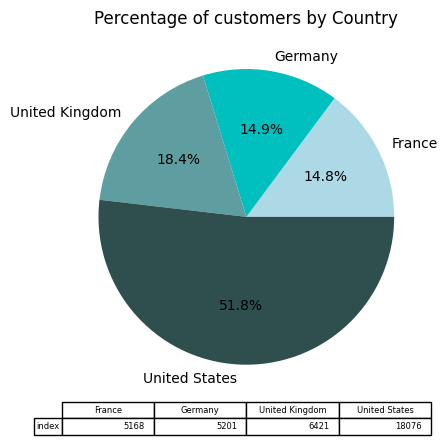

In [548]:
customer_by_country = df.groupby('Country')['index'].count()
customer_by_country.plot.pie(subplots=True, colors=['lightblue', 'c', 'cadetblue', 'darkslategray'], autopct='%1.1f%%', table=True)

plt.title('Percentage of customers by Country')
plt.ylabel('')

**1.2 จำนวนลูกค้าแบ่งตามช่วงอายุ**

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '10-20'),
  Text(1, 0, '20-30'),
  Text(2, 0, '30-40'),
  Text(3, 0, '40-50'),
  Text(4, 0, '50-60'),
  Text(5, 0, '60-70'),
  Text(6, 0, '70-80'),
  Text(7, 0, '80-90')])

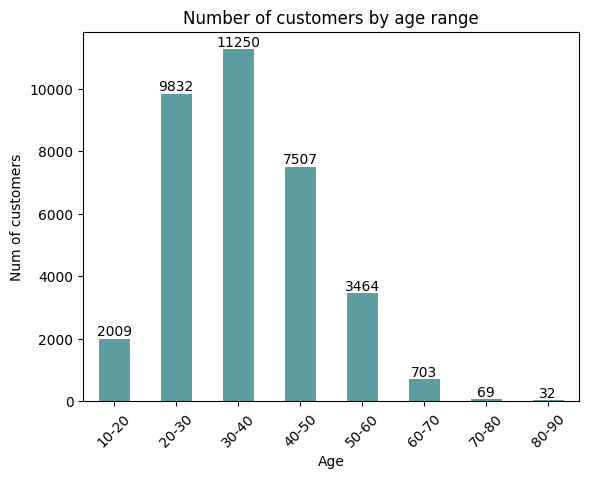

In [414]:
age_bins = [10, 20, 30, 40, 50 ,60, 70, 80, 90]
age_labels = ['10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90']
df['Age Range'] = pd.cut(df['Customer Age'], bins=age_bins, labels=age_labels)

customer_age = df.groupby('Age Range')['index'].count()
customer_age.plot(kind='bar', color='cadetblue')

for i, v in enumerate(customer_age):
    plt.annotate(str(v), xy=(i, v), ha='center', va='bottom')
    
plt.title('Number of customers by age range')
plt.xlabel('Age')
plt.ylabel('Num of customers')
plt.xticks(rotation=45)

> ลูกค้าส่วนใหญ่มีช่วงอายุอยู่ที่ 30-40 ปี จำนวน 11250 คน และช่วงอายุที่ 20-30 ปีรองลงมาเป็นจำนวน 9832 คน

**1.3 จำนวนลูกค้าแบ่งตามเพศ**

Text(0, 0.5, '')

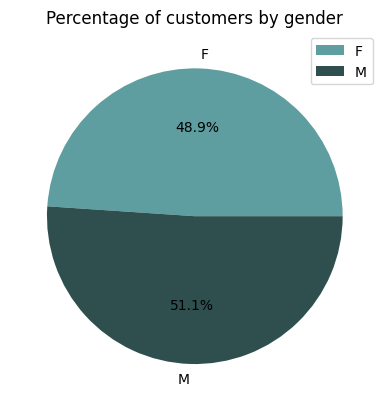

In [536]:
customer_gender = df.groupby('Customer Gender')['index'].count()
customer_gender.plot.pie(subplots=True, colors=['cadetblue','darkslategray'], autopct='%1.1f%%', legend=True)

plt.title('Percentage of customers by gender')
plt.ylabel('')

> มีจำนวนลูกค้าเพศชายและเพศหญิงไม่ต่างกันมาก

### 2. Purchase Behavior Analysis

**2.1 จำนวนยอดขาย(ครั้ง)แยกตามประเภทสินค้า**

(array([0, 1, 2]),
 [Text(0, 0, 'Accessories'), Text(1, 0, 'Bikes'), Text(2, 0, 'Clothing')])

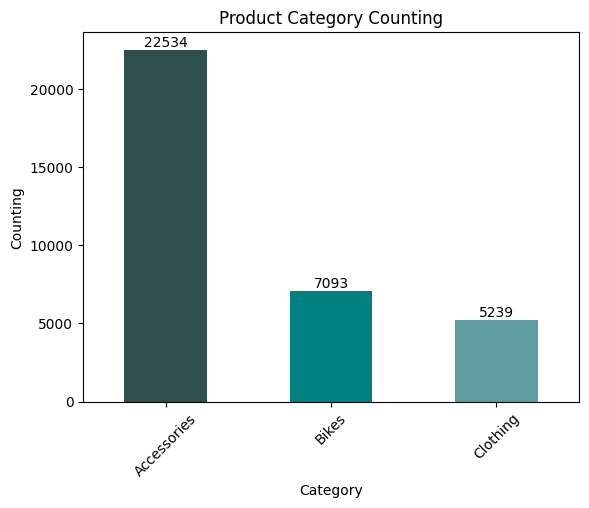

In [416]:
sales_category = df.groupby('Product Category')['index'].count()
sales_category.plot(kind='bar', color=['darkslategray', 'teal', 'cadetblue'])

for i, v in enumerate(sales_category):
    plt.annotate(str(v), xy=(i, v), ha='center', va='bottom')
    
plt.title('Product Category Counting')
plt.xlabel('Category')
plt.ylabel('Counting')
plt.xticks(rotation=45)

> ประเภทสินค้าที่มียอดการซื้อมากที่สุดคือ สินค้าในหมวดหมู่ Accessories ซึ่งมีจำนวนการซื้อ 22534 ครั้ง

**2.2 กำไรของสินค้าแต่ละประเภท**

In [417]:
sales_by_category = df[['Product Category','Quantity','Cost','Revenue','Unit Margin','Profit']].groupby('Product Category').sum('Profit')
sales_by_category['Percentage Profit'] = (sales_by_category['Profit'] / sales_by_category['Cost']) * 100
sales_by_category['Percentage Profit'] = sales_by_category['Percentage Profit'].apply(lambda x: f'{x:.2f}%')

sales_by_category

,Quantity,Cost,Revenue,Unit Margin,Profit,Percentage Profit
Product Category,,,,,,
Accessories,45048.0,6041895.0,7420664.0,839366.813304,1378769.0,22.82%
Bikes,14291.0,11148754.0,11486355.0,202578.493321,337601.0,3.03%
Clothing,10481.0,2892325.0,3437557.0,330098.686665,545232.0,18.85%


<Axes: title={'center': 'Profit by product category'}, ylabel='Profit'>

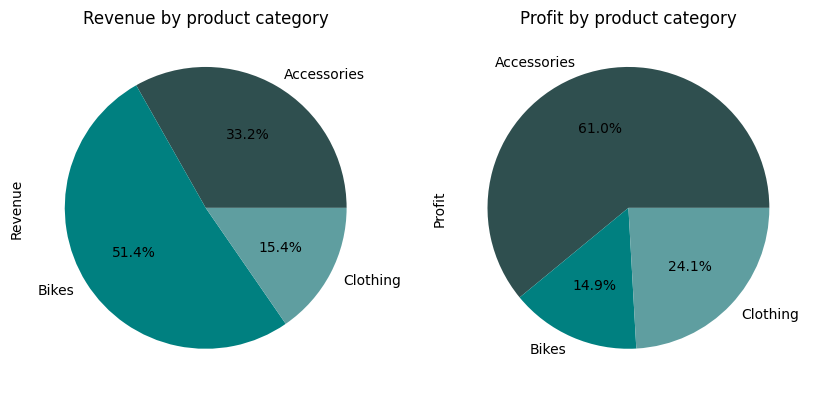

In [418]:
plt.figure(figsize = (10,8))

plt.subplot(1, 2, 1)
plt.title('Revenue by product category')
sales_by_category.groupby('Product Category')['Revenue'].sum().plot.pie(autopct="%1.1f%%", colors=['darkslategray', 'teal', 'cadetblue'])

plt.subplot(1, 2, 2)
plt.title('Profit by product category')
sales_by_category.groupby('Product Category')['Profit'].sum().plot.pie(autopct="%1.1f%%", colors=['darkslategray', 'teal', 'cadetblue'])

> สินค้าประเภท Bikes มีอัตรารายได้มากที่สุดอยู่ที่ร้อยละ 51.4% แต่สินค้าประเภท Accessories กลับมีอัตรากำไรมากที่สุดอยู่ที่ร้อยละ 61.0% และสินค้าประเภท Bikes มีอัตรากำไรเพียงแค่ 14.9% เท่านั้น

(array([0, 1, 2]),
 [Text(0, 0, 'Accessories'), Text(1, 0, 'Bikes'), Text(2, 0, 'Clothing')])

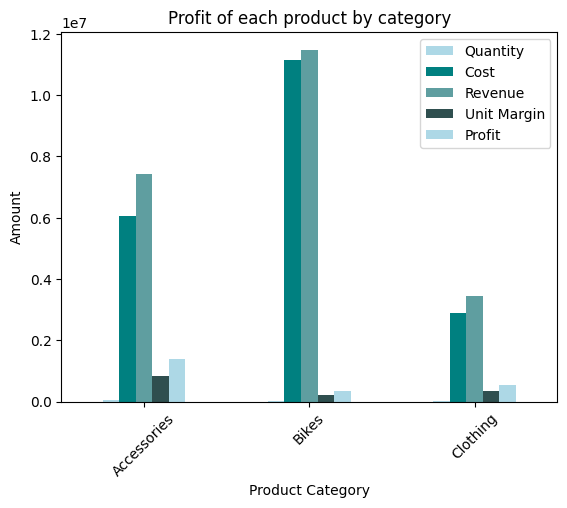

In [419]:
sales_by_category.plot(kind='bar', color=['lightblue', 'teal', 'cadetblue', 'darkslategray'])

plt.title('Profit of each product by category')
plt.ylabel('Amount')
plt.xlabel('Product Category')
plt.xticks(rotation=45)

> สินค้าประเภท Bikes มีรายได้มากที่สุด แต่มีเปอร์เซ็นต์ของกำไรเพียงแค่ 3.03% เนื่องจากมีส่วนต่างระหว่างต้นทุนและรายได้ต่ำ
> และสินค้าประเภท Accessories ,มียอดขายสูงสุดและมีรายได้รองลงมาและมีเปอร์เซ็นต์ของกำไรสูงสุด 22.82%

**2.3 เปอร์เซ็นต์ยอดขายของสินค้าทั้งหมด**

In [420]:
sales_subcategory = df[['Sub Category','Cost','Revenue','Profit']].groupby('Sub Category').sum('Profit')

total_sales = df['Revenue'].sum()
sales_subcategory['Percentage Sales'] = (sales_subcategory['Revenue']/total_sales) * 100
sales_subcategory['Percentage Sales'] = sales_subcategory['Percentage Sales'].apply(lambda x: f'{x:.2f}%')
sales_subcategory

,Cost,Revenue,Profit,Percentage Sales
Sub Category,,,,
Bike Racks,105960.0,140854.0,34894.0,0.63%
Bike Stands,125610.0,150911.0,25301.0,0.68%
Bottles and Cages,579840.0,709407.0,129567.0,3.17%
Caps,212382.0,255992.0,43610.0,1.15%
Cleaners,68223.0,82887.0,14664.0,0.37%
Fenders,257801.0,329204.0,71403.0,1.47%
Gloves,182536.0,228353.0,45817.0,1.02%
Helmets,2219735.0,2738210.0,518475.0,12.25%
Hydration Packs,330935.0,403276.0,72341.0,1.80%


<Axes: ylabel='Sub Category'>

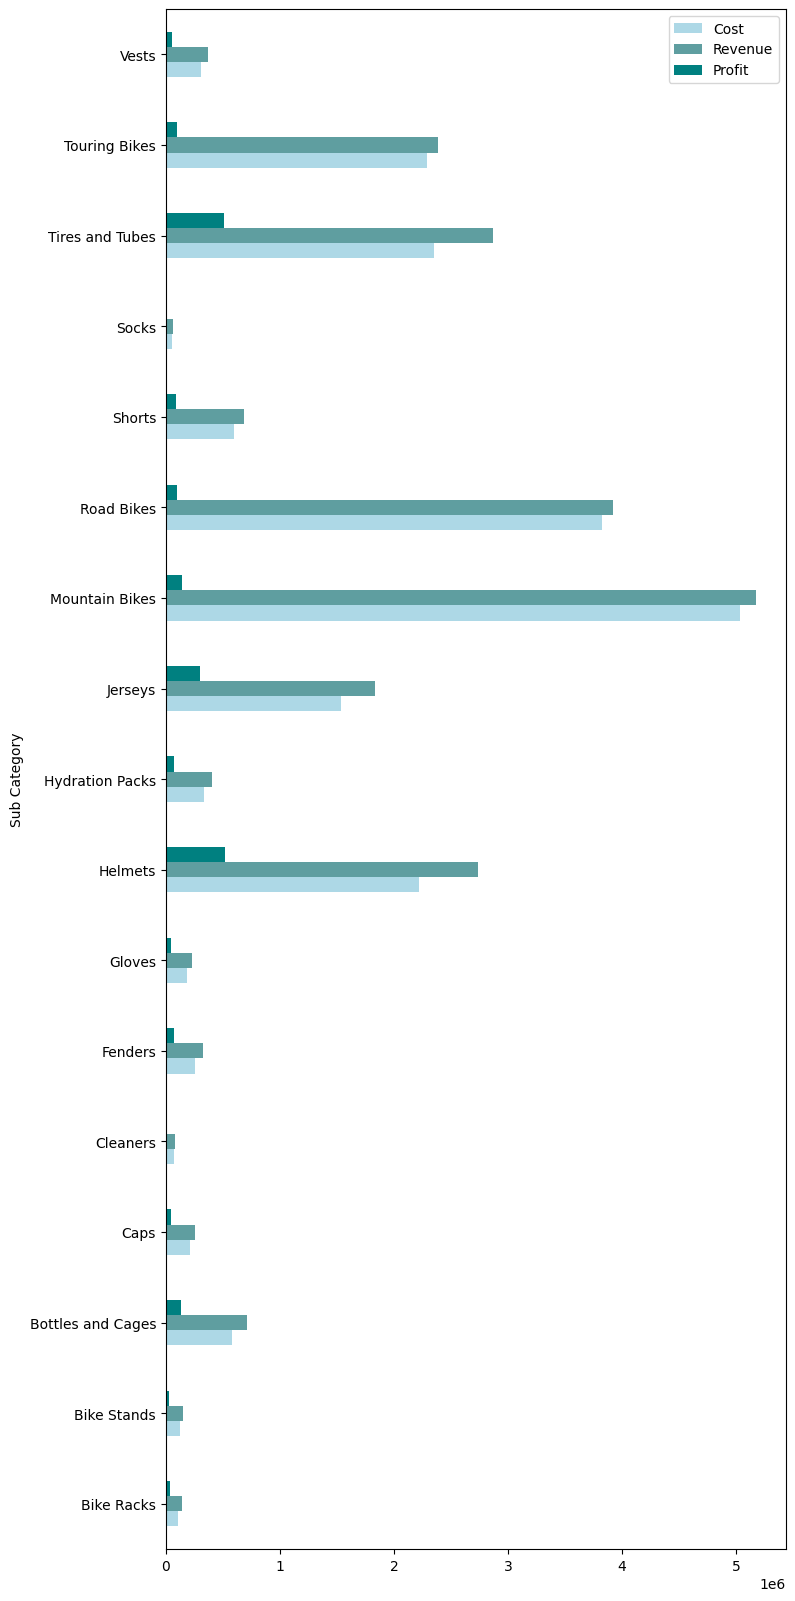

In [421]:
sales_subcategory.plot(kind="barh",color=['lightblue','cadetblue','teal'], figsize=(8, 20))

> ยอดขาย Mountain Bikes มีอัตราส่วนรายได้มากสุดอยู่ที่ 23.17%
>
> รองลงมาคือ Road Bikes 17.55% และ Tires and Tube 12.83%

**2.4 ต้นทุน รายได้ และกำไรในของยอดขายแต่ละประเทศ**

In [422]:
sales_by_country = df[['Country','Cost','Revenue','Unit Margin','Profit']].groupby('Country').sum('Profit').sort_values('Profit', ascending = False)
sales_by_country

,Cost,Revenue,Unit Margin,Profit
Country,,,,
Germany,3285685.0,4244510.0,588341.506667,958825.0
United States,9676577.0,10377742.0,427916.589981,701165.0
United Kingdom,3947265.0,4276220.0,198883.946652,328955.0
France,3173447.0,3446104.0,156901.949990,272657.0


> ประเทศ Germany มีกำไรมากที่สุดและประเทศ France มีกำไรน้อยที่สุด

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Germany'),
  Text(1, 0, 'United States'),
  Text(2, 0, 'United Kingdom'),
  Text(3, 0, 'France')])

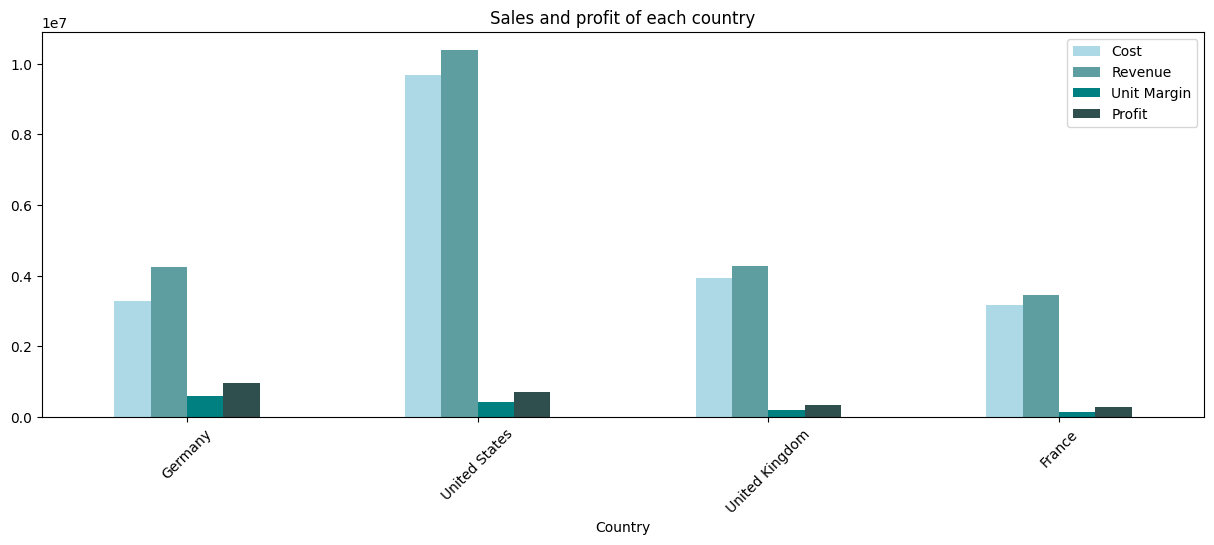

In [423]:
sales_by_country.plot(kind='bar', color=['lightblue', 'cadetblue', 'teal', 'darkslategray'], figsize=(15, 5))

plt.title('Sales and profit of each country')
plt.xticks(rotation=45)

> พบว่าประเทศ United States มีอัตรารายได้มากที่สุดและมีต้นทุนมากที่สุดเช่นเดียวกัน แต่ประเทศ Germany กลับมีอัตรากำไรมากที่สุด ซึ่งส่วนต่างของประเทศอื่นค่อนข้างต่ำเมื่อเทียบกับประเทศ Germany

**2.5 ยอดขายสินค้าแต่ละประเภทใน 4 ประเทศ**

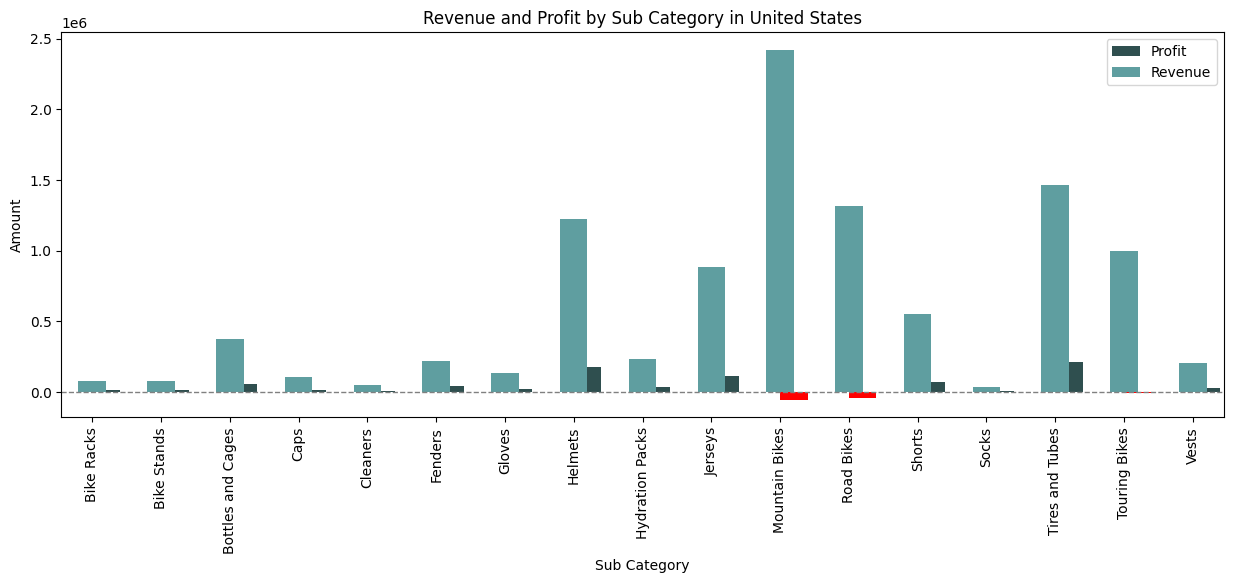

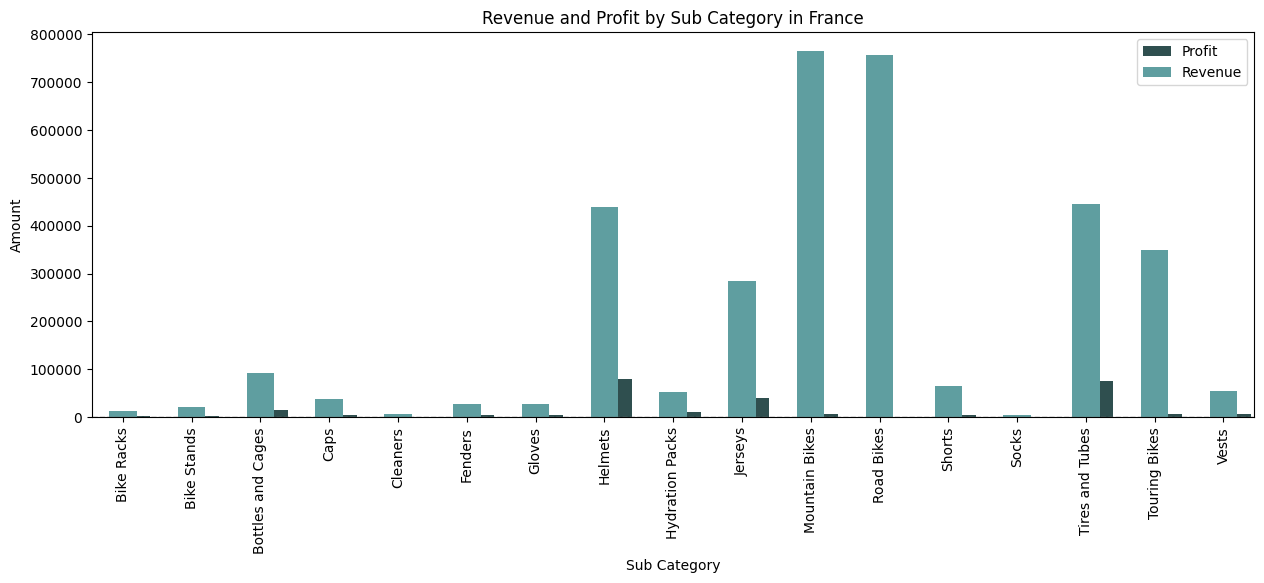

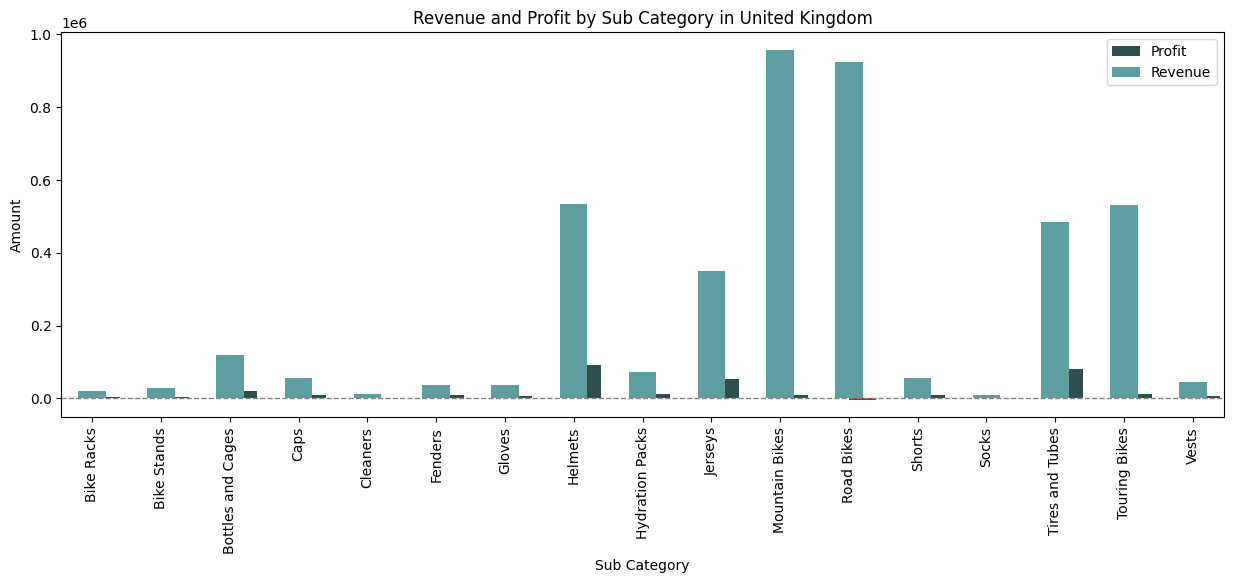

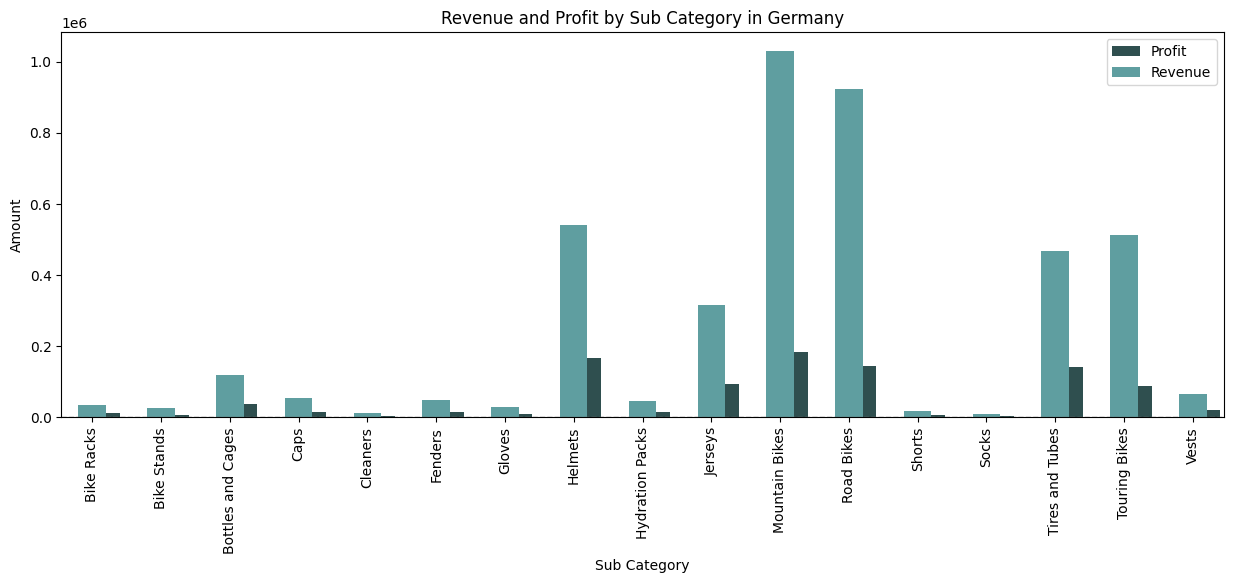

In [424]:
sales_by_countries = df.pivot_table(index='Sub Category', columns='Country', values=['Profit', 'Revenue'], aggfunc='sum')

countries = df['Country'].unique() 
for country in countries:
    fig, ax = plt.subplots(figsize=(15, 5))
    
    profit = sales_by_countries[('Profit', country)]
    revenue = sales_by_countries[('Revenue', country)]
    
    profit.plot(kind='bar', ax=ax, width=0.4, position=0, label='Profit', color=['red' if val < 0 else 'darkslategray' for val in profit], align='center', legend=True)
    revenue.plot(kind='bar', ax=ax, width=0.4, position=1, label='Revenue', color=['red' if val < 0 else 'cadetblue' for val in revenue], align='edge', legend=True)
    
    ax.axhline(color = 'gray', linestyle = '--', linewidth=1)
    
    ax.set_xlabel('Sub Category')
    ax.set_ylabel('Amount')
    ax.set_title(f'Revenue and Profit by Sub Category in {country}')
    
    plt.show()

> * ประเทศ United States สินค้าที่มียอดขายมากที่สุด 3 อันดับแรกได้แก่ สินค้าประเภท Mountain Bikes, Road Bikes และ Touring Bikes ซึ่งขาดทุนทั้ง 3 รายการ
> * ประเทศ France สินค้าที่มียอดขายมากที่สุด 3 อันดับแรกได้แก่ สินค้าประเภท Mountain Bikes, Road Bikes และ Helmet ซึ่งสินค้า 2 อันดับแรกมีอัตรากำไรที่ค่อนข้างน้อย หรือแทบไม่มีกำไรเลย
> * ประเทศ United Kingdom สินค้าที่มียอดขายมากที่สุด 3 อันดับแรกได้แก่ สินค้าประเภท Mountain Bikes, Road Bikes และ Helmet ซึ่งสินค้า Raod Bikes ขาดทุนอยู่เล็กน้อย และ Mountain Bikes มีอัตรากำไรที่ค่อนข้างน้อยเมื่อเทียบกับรายได้
> * ประเทศ Germany สินค้าที่มียอดขายมากที่สุด 3 อันดับแรกได้แก่ สินค้าประเภท Mountain Bikes, Road Bikes และ Helmet ซึ่งสินค้าทั้งหมดมีกำไร และสินค้าบางรายการมีอัตรากำไรที่ค่อนข้างดี

**2.6 กำไรรายเดือนและปีแต่ละประเทศ**

**2.6.1 กำไรในปี 2015**

<Axes: title={'center': 'Profit by Month and Year 2015'}, xlabel='Month'>

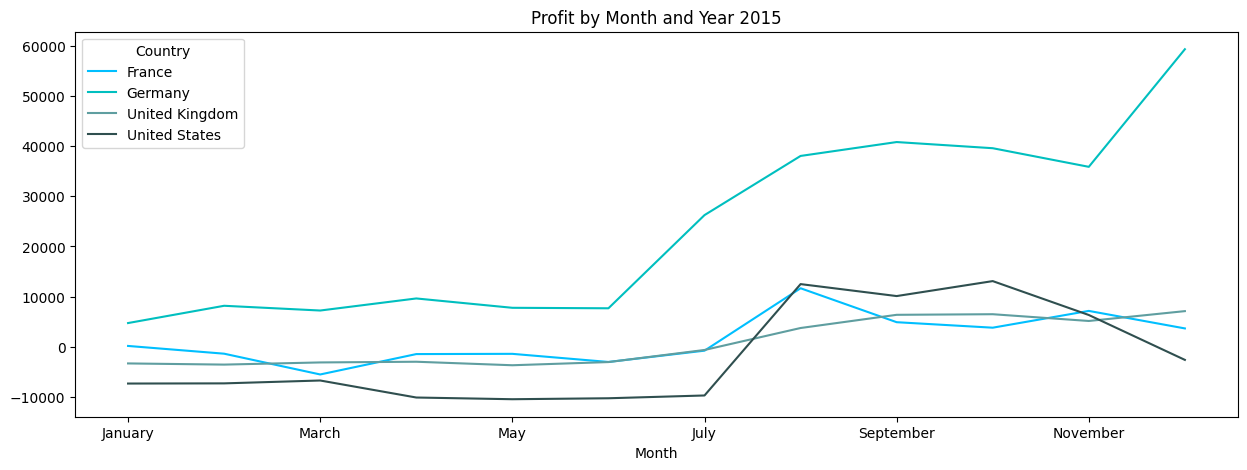

In [534]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

df['Month'] = pd.Categorical(df['Month'], categories = month_order, ordered=True)
df_2015 = df[df['Year'] == 2015]

profit_by_2015 = df_2015.pivot_table(index=['Month'], columns='Country', values=('Profit'), aggfunc='sum')
profit_by_2015 = profit_by_2015.sort_values(by=['Month'])
profit_by_2015.plot(kind='line', title='Profit by Month and Year 2015', figsize=(15,5), color = ['deepskyblue', 'c', 'cadetblue', 'darkslategray'])

In [505]:
profit_by_2015

Country,France,Germany,United Kingdom,United States
Month,,,,
January,160.0,4723.0,-3326.0,-7336.0
February,-1385.0,8167.0,-3560.0,-7302.0
March,-5527.0,7221.0,-3128.0,-6730.0
April,-1462.0,9627.0,-2989.0,-10122.0
May,-1415.0,7764.0,-3689.0,-10462.0
June,-3034.0,7668.0,-3055.0,-10270.0
July,-782.0,26245.0,-644.0,-9715.0
August,11660.0,38041.0,3736.0,12489.0
September,4894.0,40808.0,6366.0,10104.0


> ในช่วงไตรมาสที่ 1,2 ของปี 2015 ประเทศ France, United Kingdom และ United States ยังขาดทุนอยู่เล็กน้อย แต่ประเทศ Germany กลับมีกำไรตลอดปี 2015

> ในช่วงไตรมาสที่ 3,4 ของปี 2015 ประเทศ Germany มีอัตรากำไรเติบโตอย่างรวดเร็ว แต่ประเทศอื่นมีอัตรากำไรไม่ต่างจากเดิมมาก เพียงแต่เพิ่มขึ้นมาเล็กน้อยจากไตรมาสแรก

**2.6.2 กำไรในปี 2016**

<Axes: title={'center': 'Profit by Month and Year 2016'}, xlabel='Month'>

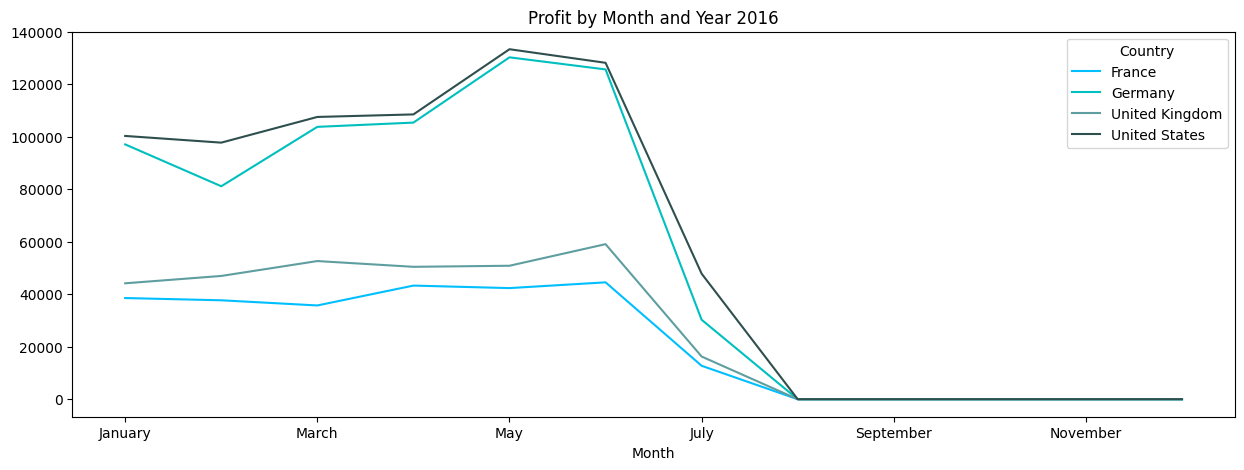

In [535]:
df_2016 = df[df['Year'] == 2016]

profit_by_2016 = df_2016.pivot_table(index=['Month'], columns='Country', values=('Profit'), aggfunc='sum')
profit_by_2016 = profit_by_2016.sort_values(by=['Month'])
profit_by_2016.plot(kind='line', title='Profit by Month and Year 2016', figsize=(15,5), color = ['deepskyblue', 'c', 'cadetblue', 'darkslategray'])

In [512]:
profit_by_2016

Country,France,Germany,United Kingdom,United States
Month,,,,
January,38561.0,97120.0,44181.0,100342.0
February,37705.0,81165.0,46981.0,97789.0
March,35736.0,103804.0,52657.0,107580.0
April,43308.0,105427.0,50464.0,108547.0
May,42350.0,130302.0,50870.0,133392.0
June,44547.0,125691.0,59098.0,128213.0
July,12745.0,30288.0,16269.0,47850.0
August,0.0,0.0,0.0,0.0
September,0.0,0.0,0.0,0.0


> ในช่วงไตรมาสที่ 1 ทุกประเทศมีอัตรากำไรที่ดี โดยเฉพาะ Germany และ United States ซึ่งจากปี 2015 ประเทศ United States มีอัตรากำไรที่น้อยกว่าประเทศ Germany แต่ในปี 2016 ประเทศ United States กลับมีอัตรากำไรที่สูงขึ้นมากกว่าประเทศ Germany

> ในช่วงไตรมาสที่ 2 ทุกประเทศมีอัตรากำไรไม่ต่างจากเดิมมากนัก แต่ช่วงต้นของไตรมาสที่ 3 กลับมีกำไรลดน้อยลง

# Conclusion

* ฐานลูกค้าส่วนใหญ่อยู่ในประเทศ United States มีอัตราส่วนคิดเป็นร้อยละ 51.8% ในขณะที่ประเทศ France และ Germany มีฐานลูกค้าน้อยที่สุด
* ฐานลูกค้าส่วนใหญ่มีอายุอยู่ที่ 20-40 ปี
* แม้ว่าประเทศ United States จะมีรายได้มากที่สุด แต่เมื่อเปรียบเทียบกับจำนวนลูกค้ากลับมีรายได้น้อยที่สุด เนื่องจากมีอัตราต้นทุนค่อนข้างสูง ส่วนต่างระหว่างต้นทุนและรายได้ไม่ค่อยต่างมากนัก
* ในทางกลับกัน ประเทศ Germany กลับมีการจัดการที่ดีที่สุด แม้ว่าฐานลูกค้าจะมีอัตราส่วนเพียงแค่ร้อยละ 14.9% และมีรายได้ไม่ถึงครึ่งของประเทศ United States แต่กลับมีอัตรากำไรที่สูงที่สุด
* เมื่อมาดูยอดขายตามประเภทสินค้า สินค้าประเภท Bikes มีอัตรารายได้มากที่สุดอยู่ที่ร้อยละ 51.4% แต่สินค้าประเภท Accessories กลับมีอัตรากำไรมากที่สุดอยู่ที่ร้อยละ 61.0% และสินค้าประเภท Bikes มีอัตรากำไรเพียงแค่ 14.9% เท่านั้นจากต้นทุนที่ค่อนข้างสูง
* ในภาพรวม สินค้าประเภท Bikes มีอัตรากำไรเทียบกับรายได้เพียงแค่ 3% ในขณะที่สินค้าประเภท Accessories และ Clothing มีอัตรากำไรเทียบกับรายได้ประมาณ 20%
* ยอดขายตามประเภทย่อยของสินค้า สินค้าประเภทยอดขาย Mountain Bikes มีอัตราส่วนรายได้มากสุดอยู่ที่ 23.17% รองลงมาคือ Road Bikes 17.55% และ Tires and Tube 12.83% แต่ 3 รายการดังกล่าวกลับมีกำไรที่ค่อนข้างน้อยหรือขาดทุนเล็กน้อยจากต้นทุนสูง
* ยอดขายรายปีและเดือน พบว่าในไตรมาสที่ 1,2 ประเทศ France, United Kingdom และ United States มีการขาดทุนอย่างต่อเนื่อง อาจเป็นช่วงของการจัดโปรโมชั่นและเน้นฐานลูกค้า โดยเฉพาะประเทศ United States ที่การขาดทุนค่อนข้างสูง ต่อมาไตรมาสที่ 3,4 ทุกประเทศกลับมีกำไรที่เพิ่มขึ้น และประเทศ Germany มีอัตรากำไรที่สูงสุด
* ในปี 2016 ทุกประเทศมีกำไรที่เพิ่มขึ้น แต่ในเดือนกรกฎาคมกลับมีกำไรที่ลดลงอย่างเห็นได้ชัด

* ประเทศ Germany มีการจัดการขายที่ดีที่สุด แม้ว่าฐานลูกค้าจะน้อยก็ตาม
* ประเทศ United Kingdom, France และโดยเฉพาะอย่างยิ่งประเทศ United States ควรได้รับการปรับปรุงสินค้า โดยเฉพาะต้นทุนและปัจจัยอื่นที่อาจเป็นผลทำให้กำไรลดน้อยลง
* โดยเฉพาะสินค้าประเภท Bikes ที่มีต้นทุนค่อนข้างสูง ทำให้กำไรที่ได้รับค่อนข้างน้อย
